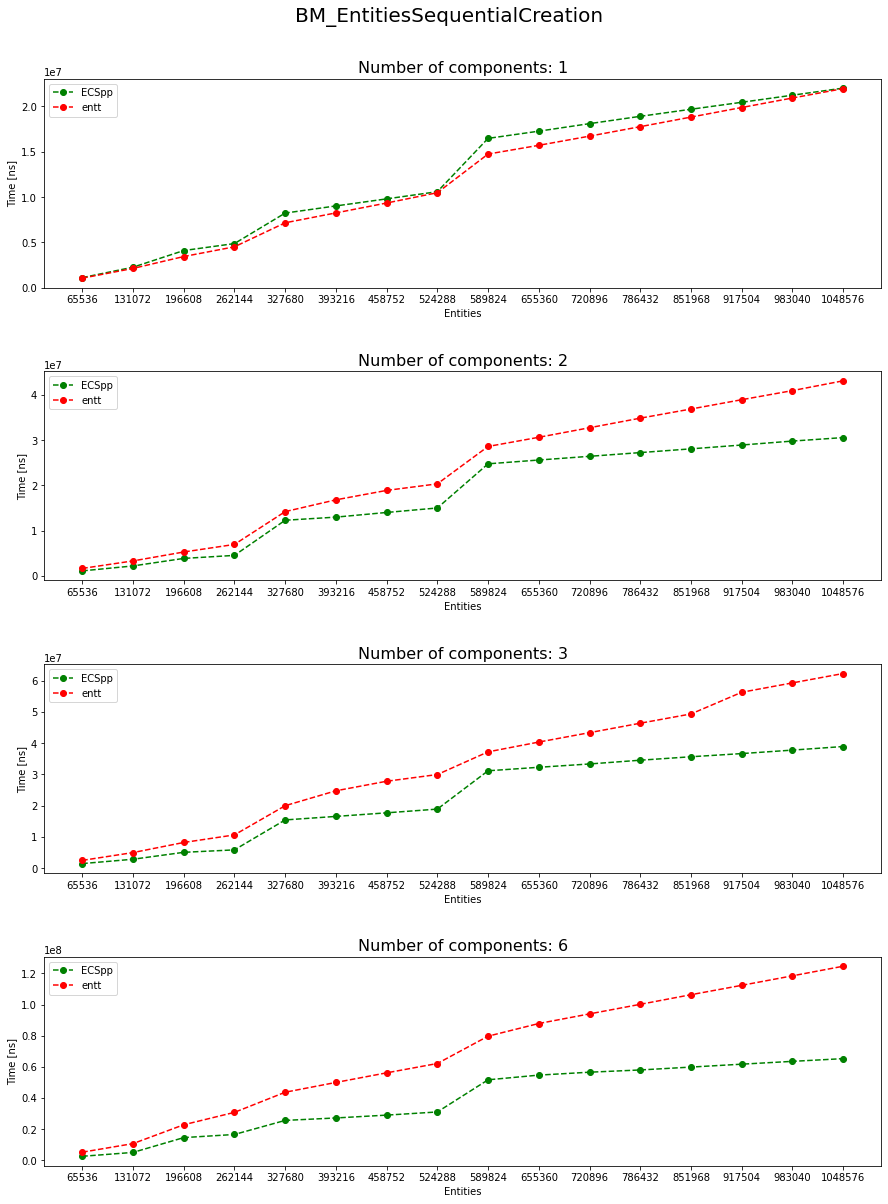

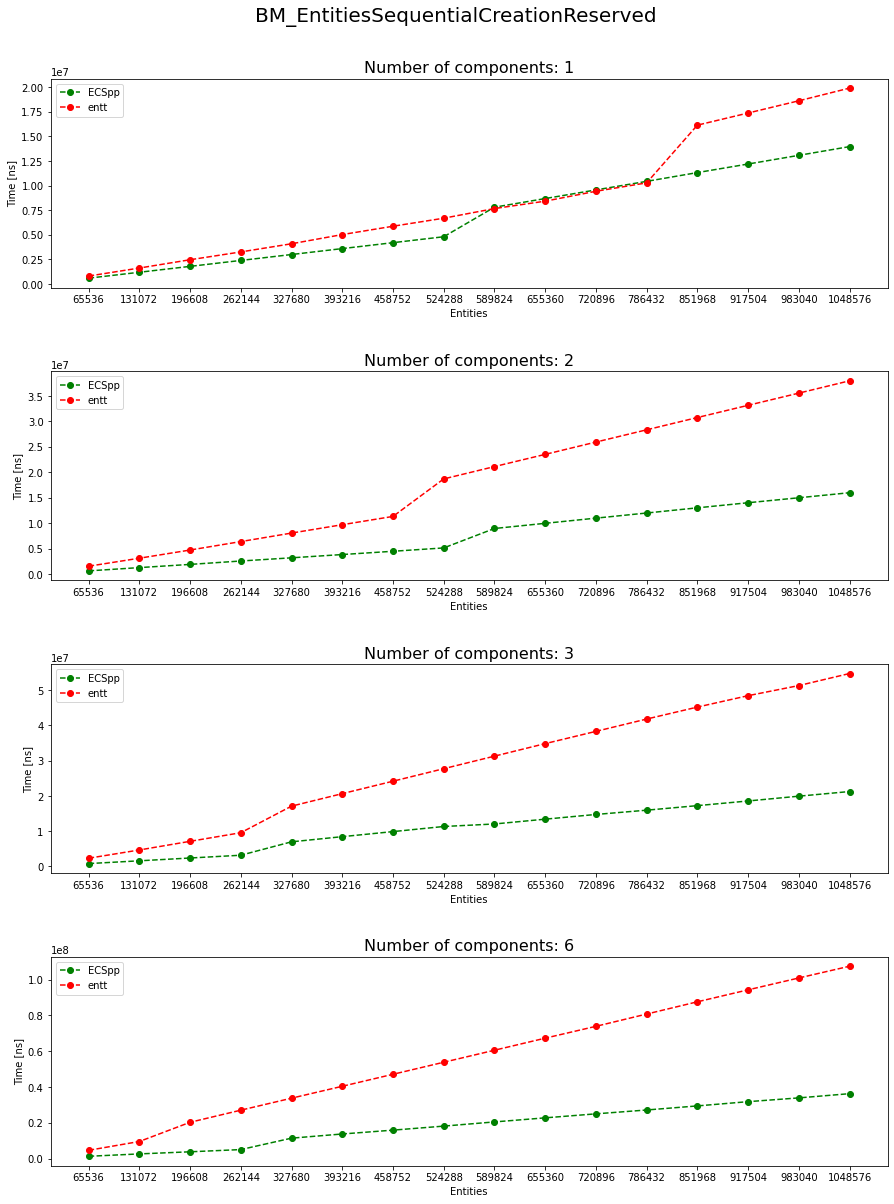

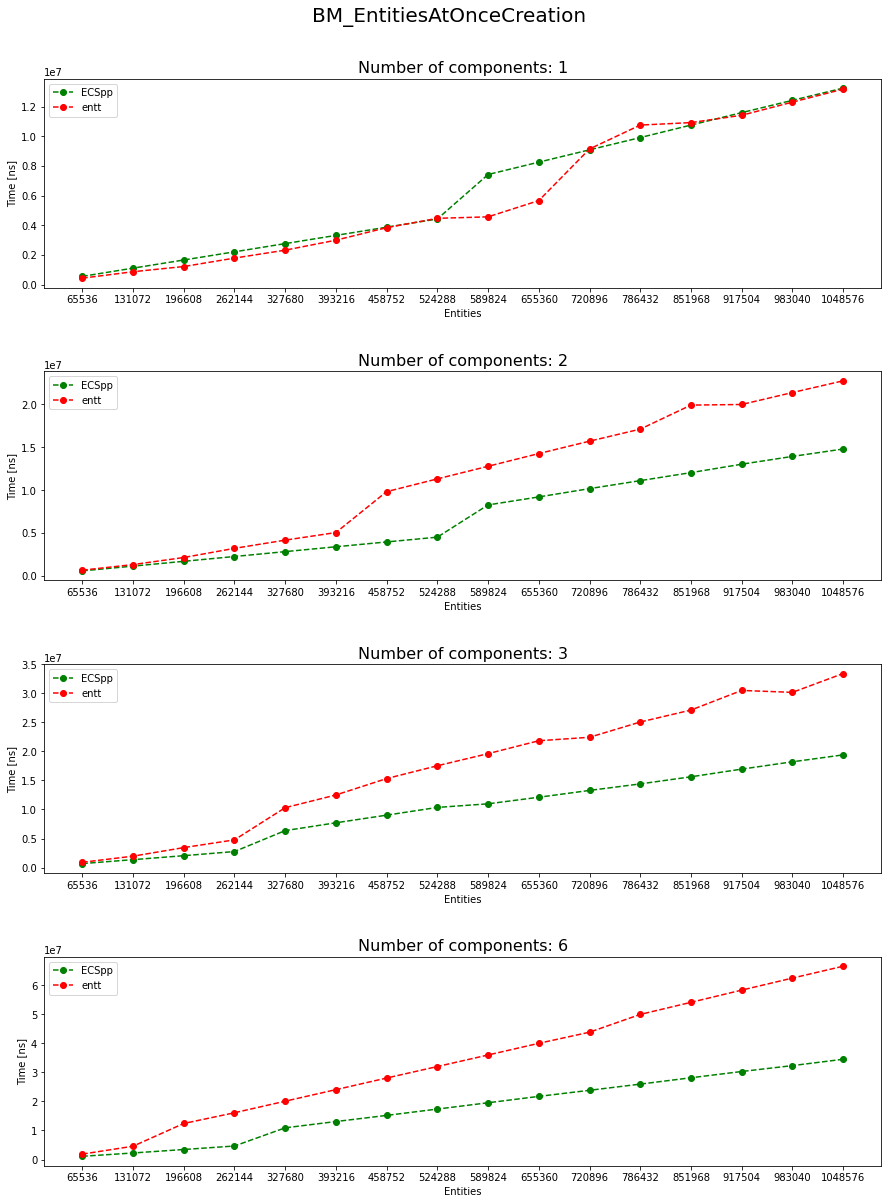

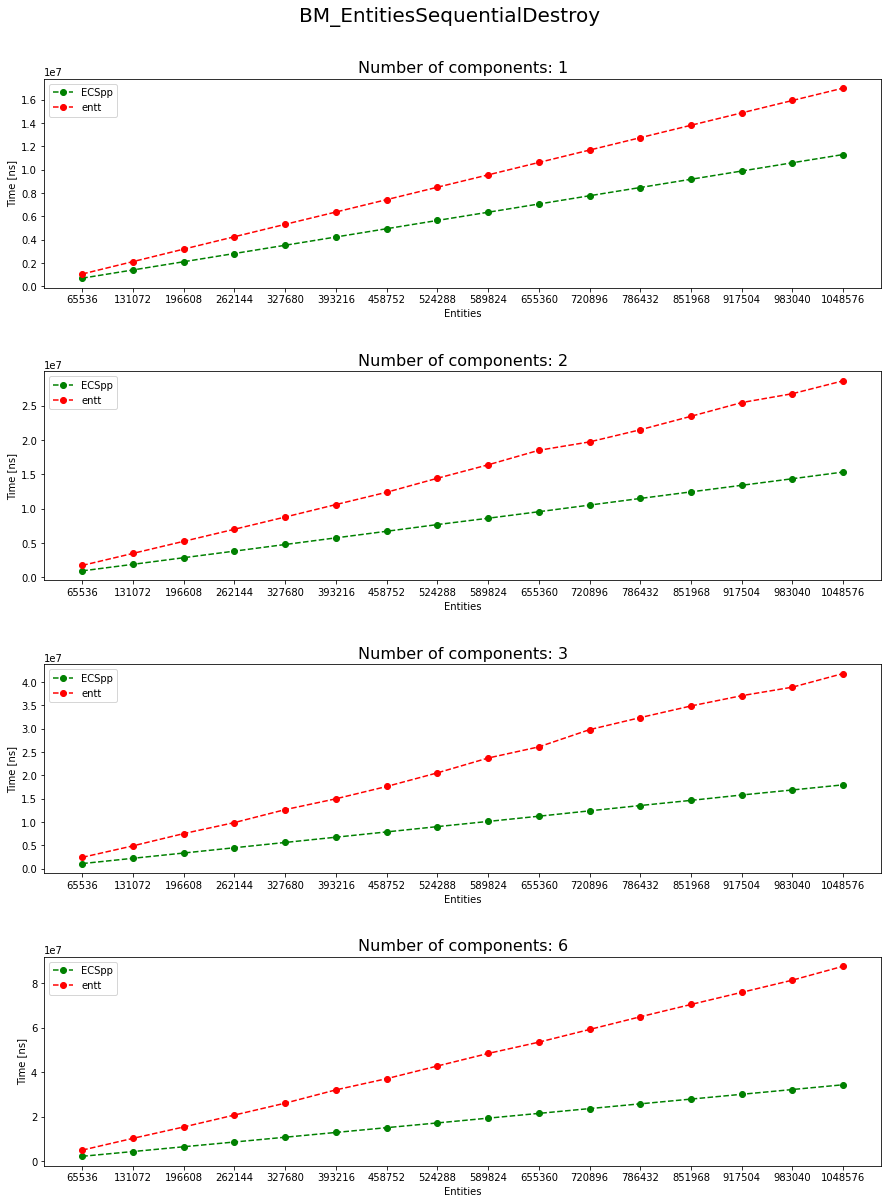

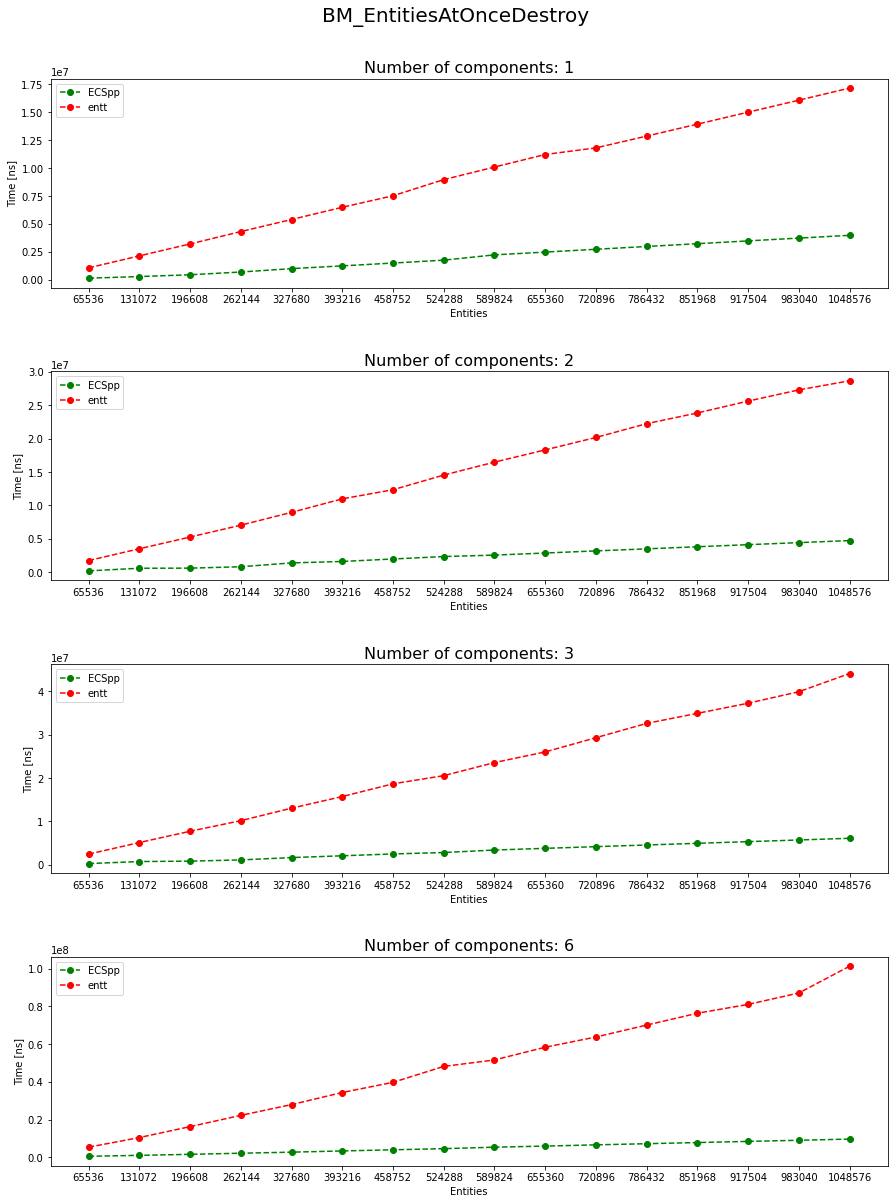

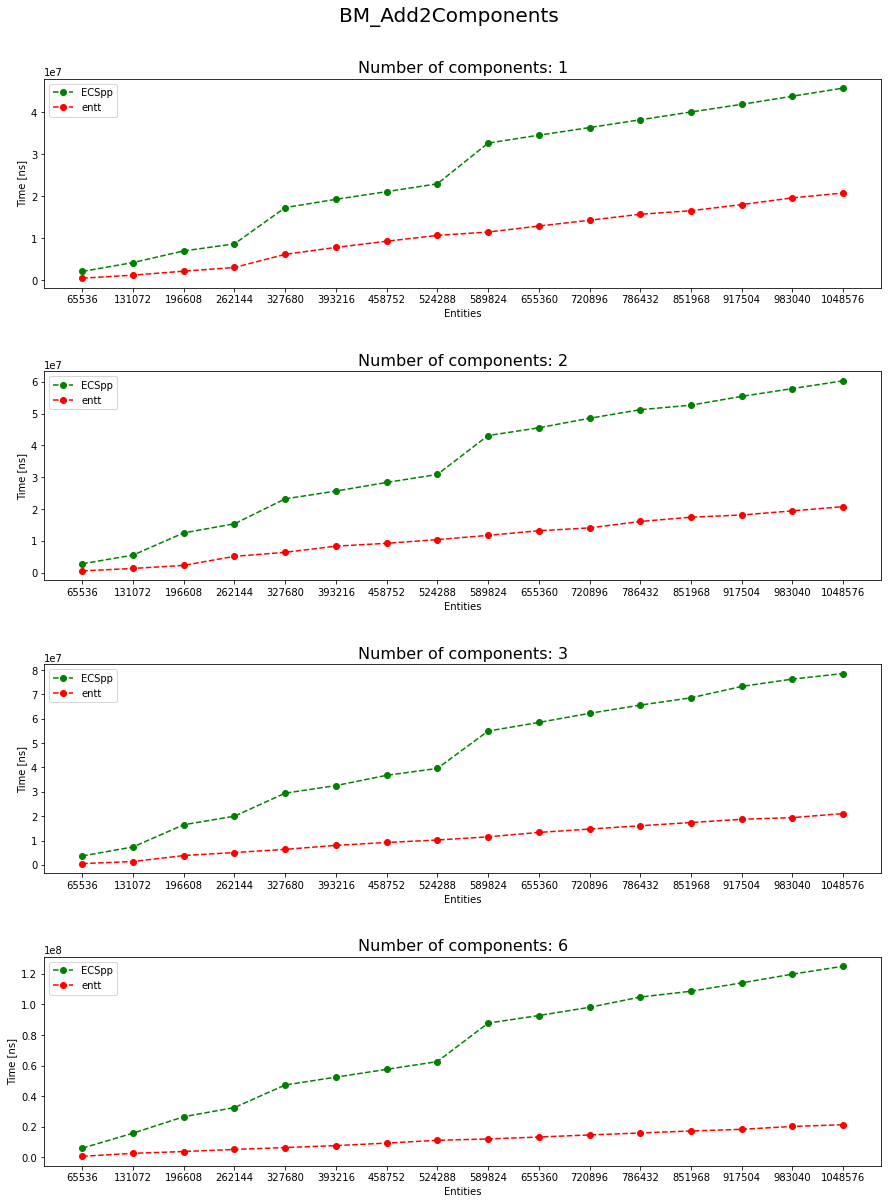

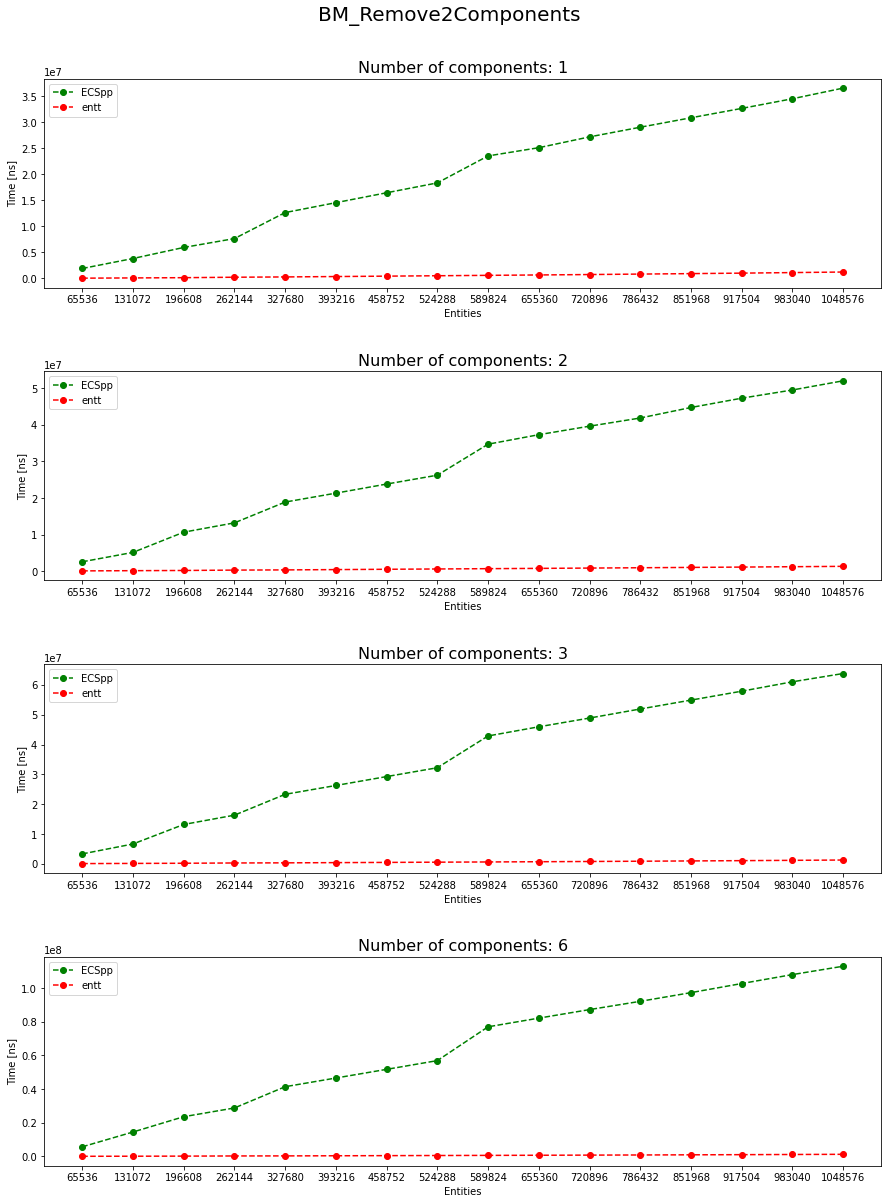

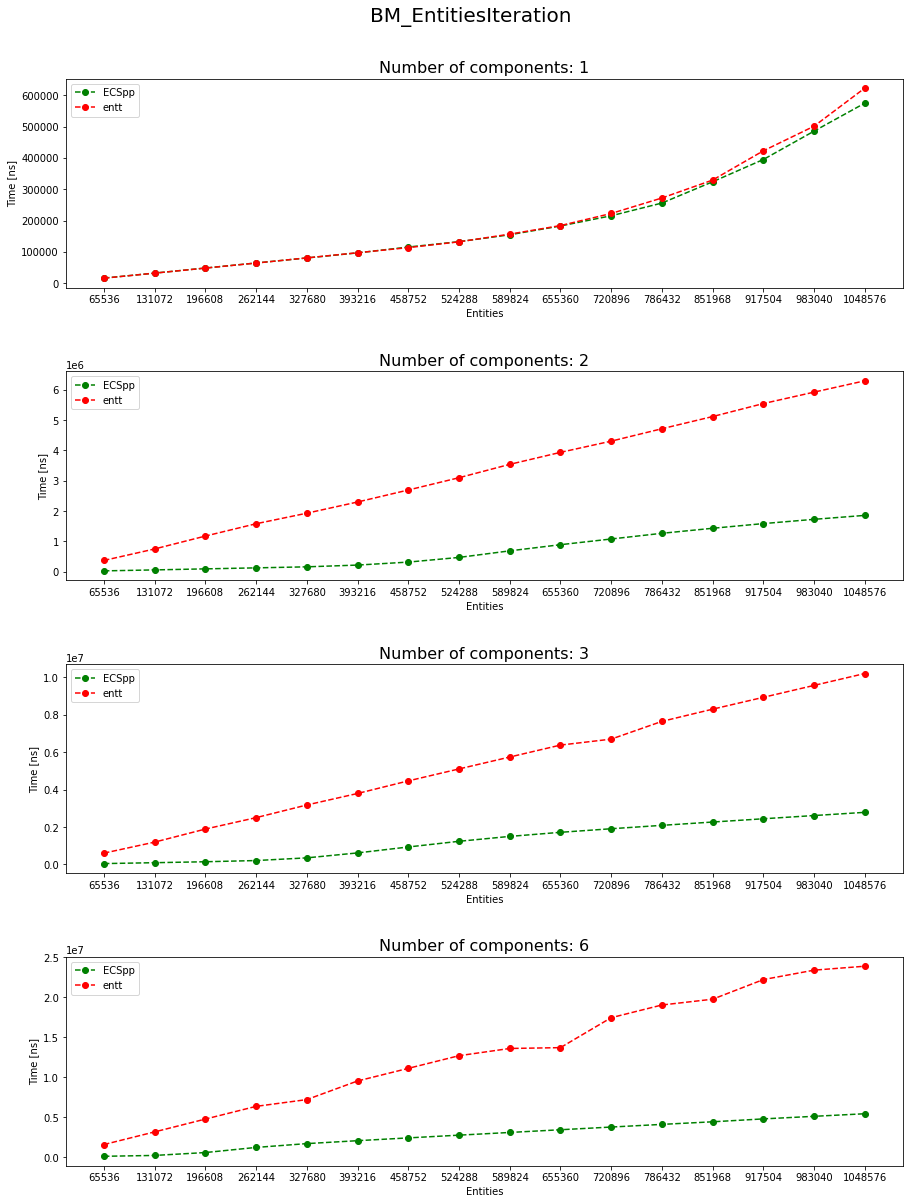

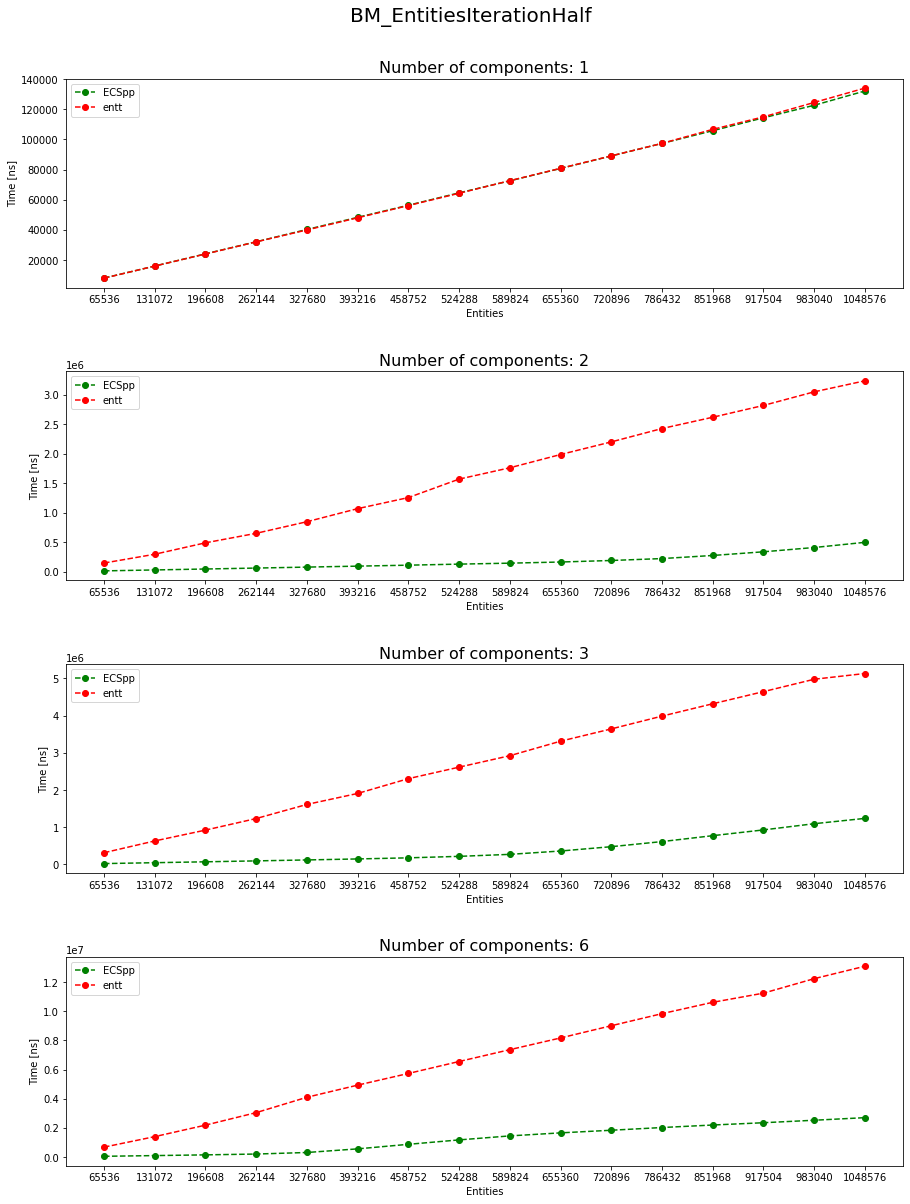

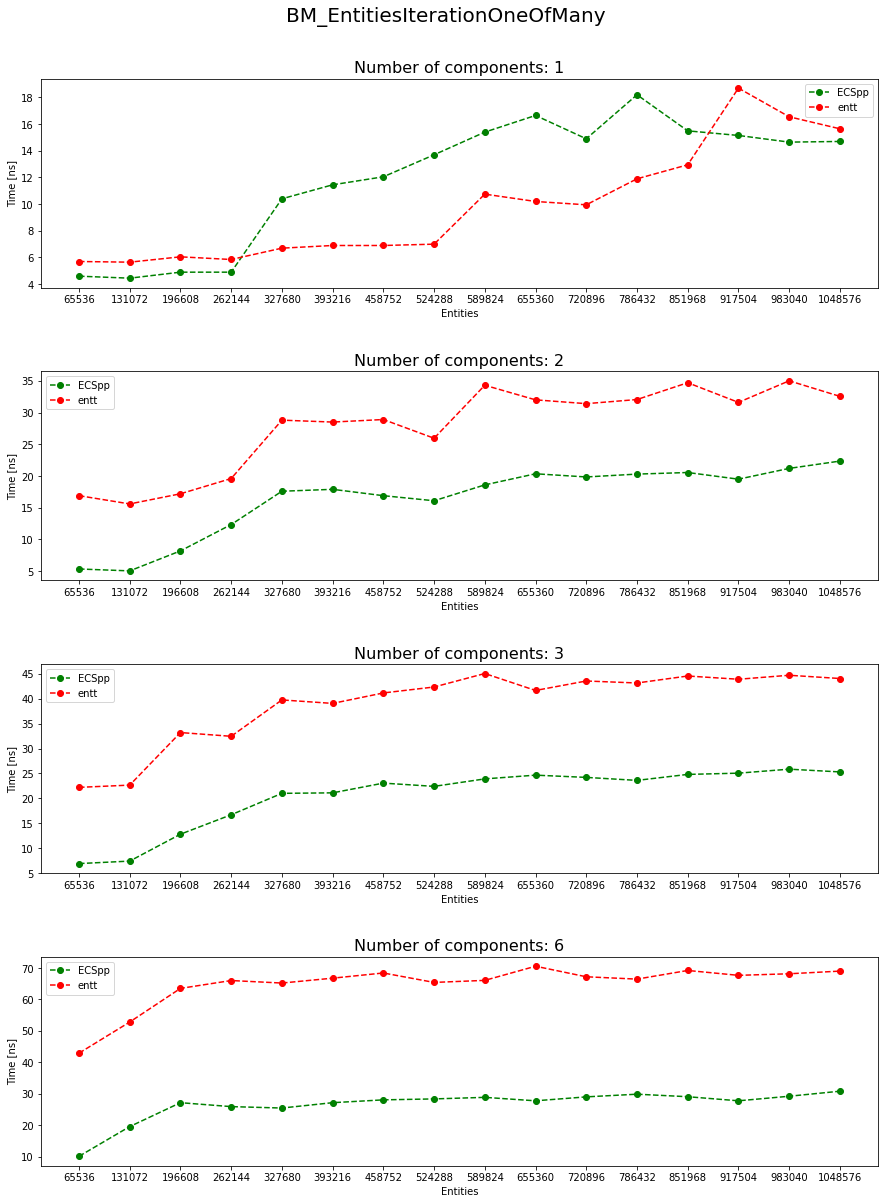

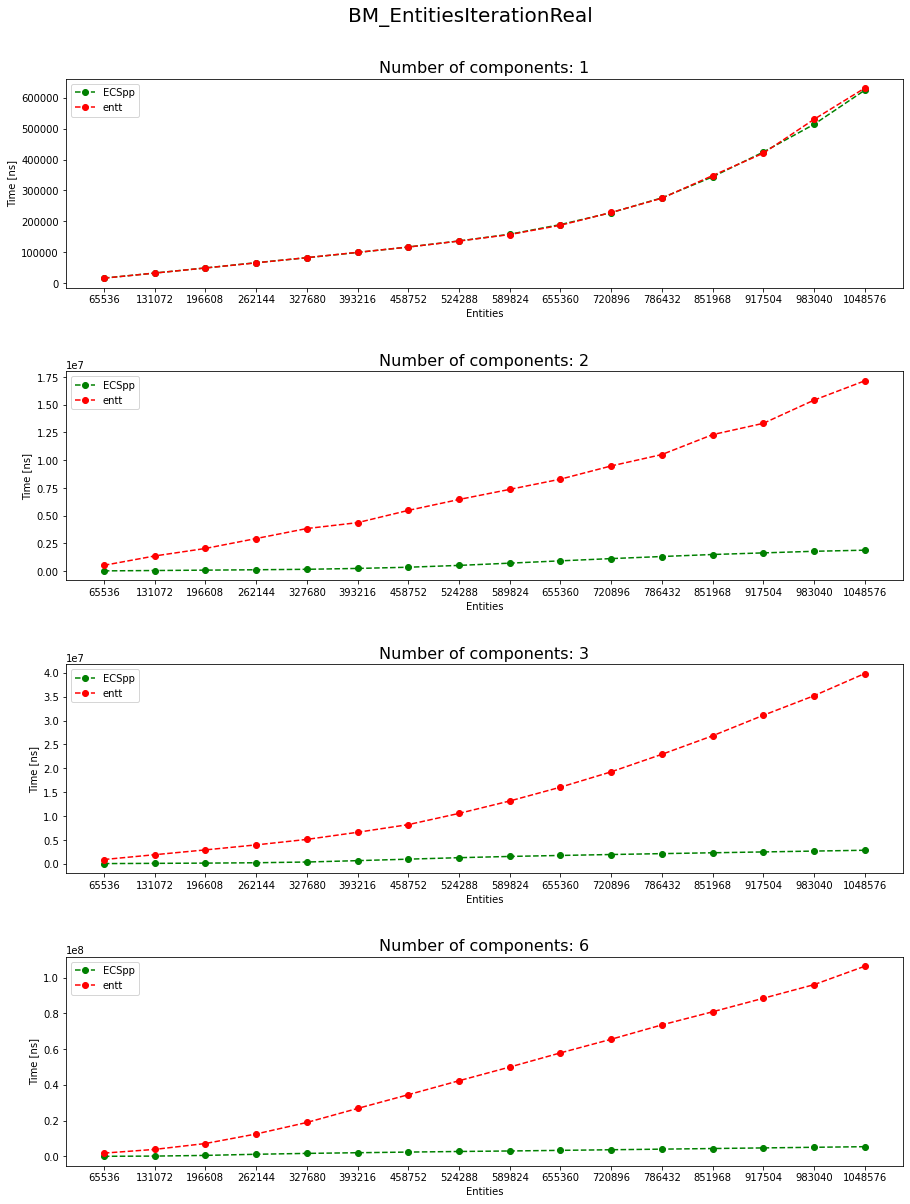

In [1]:
import json
import csv
import matplotlib.pyplot as plt
from pathlib import Path

with open('ecspp.json', 'r') as f:
    ecspp = json.load(f)
with open('entt.json', 'r') as f:
    entt = json.load(f)
result = {}
for bench in ecspp['benchmarks']:
    if bench['name'].split('_')[-1] != 'median':
        continue
    splitStr = bench['name'].split('/', 2)
    ents = splitStr[1]

    splitStr = (splitStr[0][:-1]).split('<')
    name = splitStr[0]
    comps = splitStr[1]
    ecsppTime = bench['real_time']
    result.setdefault(name, {}).setdefault(comps, {}).setdefault('ecspp', {})[ents] = ecsppTime

for bench in entt['benchmarks']:
    if bench['name'].split('_')[-1] != 'median':
        continue
    splitStr = bench['name'].split('/', 2)
    ents = splitStr[1]

    splitStr = (splitStr[0][:-1]).split('<')
    name = splitStr[0]
    comps = splitStr[1]
    enttTime = bench['real_time']
    result[name][comps].setdefault('entt', {})[ents] = enttTime
    
for bench in result:
    fig, axes = plt.subplots(4, figsize=(15,20))
    fig.suptitle(bench, fontsize=20, y = 0.93)
    i = 0
    for comp in result[bench]:
        if 'entt' in result[bench][comp]:
            axes[i].set_title('Number of components: ' + comp, fontsize=16)
            axes[i].set_xlabel('Entities')
            axes[i].set_ylabel('Time [ns]')
            line = axes[i].plot(*zip(*(result[bench][comp]['ecspp'].items())), 'go--',
                    *zip(*(result[bench][comp]['entt'].items())), 'ro--')
            line[0].set_label('ECSpp')
            line[1].set_label('entt')
            axes[i].legend()
            i += 1
    plt.subplots_adjust(hspace=0.4)